In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import igraph as ig
import os
import yaml
from os.path import join
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from scipy.stats import entropy
from scipy import stats
from functools import reduce
import sys
sys.path.insert(1, '..')
from utils import *
from collections import Counter
import geopandas as gpd
import matplotlib.ticker as ticker
import geopandas as gpd
from scipy.spatial import distance
import matplotlib.gridspec as gridspec
from sklearn.neighbors import BallTree
from math import radians
from scipy.cluster import hierarchy
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
FIG_SAVE_DIR = join('..', '..', 'figures')
RESULT_SAVE_DIR = join('..', '..', 'results')

In [5]:
with open(join('..', '..', 'config.yml')) as f:
    config = yaml.safe_load(f)
    
pwd = config['pwd']
dpath = config['storage']
patterns = config['pattern-data-path']

AREA_NAME = 'NYC'

In [6]:
# work related columns
survey_columns = [
    'home_cms_zone', 
    #'essential',  # considered essential worker 1 -> yes, 2-> no, 995 -> nan, 998 -> dont know
    'trip_purpose_work',  # work related trips based on days 0 -> have not traveled in the last week, 1-6
    'job_type'  # current work location 1-> home/remote, 2-> hybrid (telework/office), 3-> single work location (office), 4-> multiple work location, 5-> drive/bike/travel for work, 995 -> nan
]

In [7]:
survey_path = join(pwd, 'util_datasets', AREA_NAME, 'mobility-surveys')
dfs = [pd.read_csv(join(survey_path, f)) for f in os.listdir(survey_path)]

In [8]:
def plot_job_types(df):
    si = df[df.home_cms_zone == 'Staten Island']
    non_si = df[df.home_cms_zone != 'Staten Island']
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
    si[si['job_type'] < 10]['job_type'].value_counts(normalize=True).sort_index().plot.barh(ax=axes[0], rot=0)
    non_si[non_si['job_type'] < 10]['job_type'].value_counts(normalize=True).sort_index().plot.barh(ax=axes[1], rot=0)
    
    job_types = ['Home/Remote', 'Hybrid', 'Single Work Location', 'Multiple Locations', 'Drive/Bike/Travel for work'][::-1]
    axes[0].set_yticklabels(job_types)
    axes[1].set_yticklabels(job_types)
    
    axes[0].set_title('Staten Island')
    axes[1].set_title('Other Regions')
    axes[0].grid(axis='x')
    axes[1].grid(axis='x')
    
    fig.suptitle('Job Type Distribution')

In [9]:
def plot_trip_purpose_work(df):
    si = df[df.home_cms_zone == 'Staten Island']
    non_si = df[df.home_cms_zone != 'Staten Island']
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
    si.trip_purpose_work.value_counts(normalize=True).sort_index().plot.bar(ax=axes[0])
    non_si.trip_purpose_work.value_counts(normalize=True).sort_index().plot.bar(ax=axes[1])

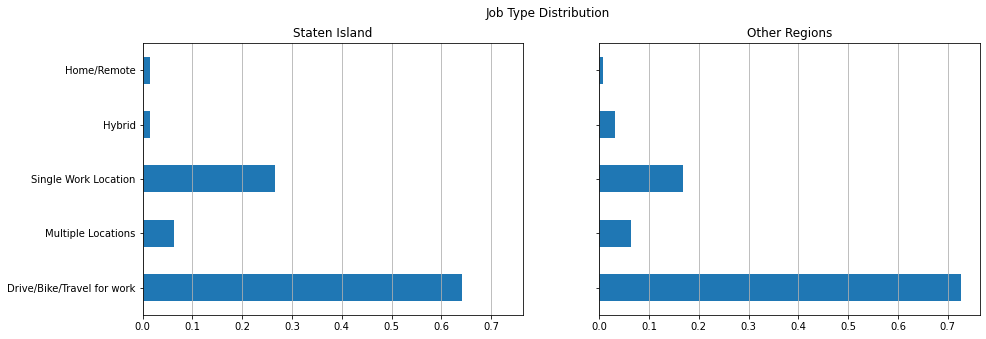

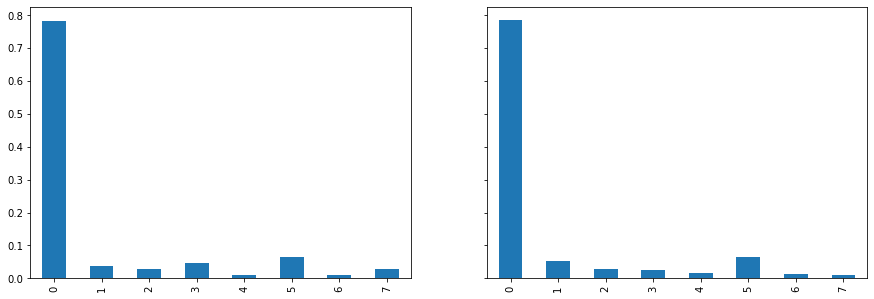

In [10]:
df = dfs[0]
df = df[survey_columns]
plot_job_types(df)
plot_trip_purpose_work(df)

In [12]:
dfs[0].columns

Index(['person_id', 'hh_id', 'exercise', 'exercise_sidewalk',
       'exercise_open_street', 'exercise_plaza', 'exercise_park',
       'exercise_trail', 'exercise_other', 'bike_num_days',
       ...
       'education_cms', 'gender_cms', 'disability_concentrating_cms',
       'disability_dressing_cms', 'disability_hearing_cms',
       'disability_mobility_cms', 'disability_seeing_cms',
       'disability_walking_cms', 'disability_none_cms', 'weight'],
      dtype='object', length=176)